# 01_Data_Visualization_XYZ(Quadril x Joelho)

## TL;DR
Fazer uma descrição de 3 linhas do objetivo do notebook e conclusões presentes na análise.

## Objetivo

Descrever com clareza qual o objetivo desse notebook.

## Dados

Descrever a base de dados utilizada.

## Modelos (opcional)

Em caso de treinamento ou comparação de modelos, descrever os modelos considerados

## Conclusões
Listar **todas** as conclusões obtidas no notebook:
1. conclusão 1
2. conclusão 2
3. etc.


## Observações importantes:
1. Sempre organize o conteúdo utilizando células markdown e seções. Também utilize células de texto para escrever sua análise das figuras que forem geradas.
2. Lembre-se que essa primeira célula deve ter informação suficiente para entender o que foi feito e quais conclusões você chegou, sem ter que ler o notebook inteiro. Isso agiliza muito a busca por informações ao longo do projeto. Além disso, seu eu do futuro (ou novas pessoas que entrem no projeto) vai agradecer se o seu notebook estiver bem escrito e completo.

# Importando as Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

# Importando Dataset

In [2]:
# Pegando apenas a 23 coluna para fazer o data frame 
# Adicionando um Header para a coluna  
df = pd.read_csv("../../data/Volt(1)/09052024-144816.csv",skiprows=1,header=None) 
print(df.head())

         0         1         2         3         4    5        6         7   \
0  1013.018  0.095703  1.041992  0.125977 -23.03125 -8.0 -7.71875  0.536133   
1  1013.035  0.095703  1.041992  0.125977 -23.03125 -8.0 -7.71875  0.536133   
2  1013.069  0.095703  1.041992  0.125977 -23.03125 -8.0 -7.71875  0.536133   
3  1013.103  0.095703  1.041992  0.125977 -23.03125 -8.0 -7.71875  0.517578   
4  1013.149  0.095703  1.041992  0.125977 -23.03125 -8.0 -7.71875  0.517578   

         8         9   ...        15     16        17       18        19  \
0  0.169922  0.822266  ... -0.333008 -5.500  -2.46875  0.71875  101.1554   
1  0.169922  0.822266  ... -0.223633 -0.250 -12.40625  2.71875  101.1554   
2  0.169922  0.822266  ... -0.223633 -0.250 -12.40625  2.71875  101.1554   
3  0.157227  0.643555  ... -0.223633 -0.250 -12.40625  2.71875  101.1554   
4  0.157227  0.643555  ... -0.242188 -0.375   3.40625  2.50000  101.1554   

         20        21        22        23        24  
0  100.2091  1

In [3]:
df.info()
print(df.isnull().sum())  # Quantidade de valores nulos
df.describe()
# Descrição estatistica da coluna

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       458 non-null    float64
 1   1       458 non-null    float64
 2   2       458 non-null    float64
 3   3       458 non-null    float64
 4   4       458 non-null    float64
 5   5       458 non-null    float64
 6   6       458 non-null    float64
 7   7       458 non-null    float64
 8   8       458 non-null    float64
 9   9       458 non-null    float64
 10  10      458 non-null    float64
 11  11      458 non-null    float64
 12  12      458 non-null    float64
 13  13      458 non-null    float64
 14  14      458 non-null    float64
 15  15      458 non-null    float64
 16  16      458 non-null    float64
 17  17      458 non-null    float64
 18  18      458 non-null    float64
 19  19      458 non-null    float64
 20  20      458 non-null    float64
 21  21      458 non-null    float64
 22  22

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
count,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,...,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000
mean,1020.620902,0.078206,0.898273,-0.187513,3.113402,-1.427061,0.667167,0.474277,0.356140,0.586707,...,-0.283792,0.683883,-1.325668,-0.482738,120.563710,87.694933,187.883879,100.402943,240.179821,159.141567
std,4.409249,0.107265,0.321357,0.338601,53.137707,9.731029,10.663012,0.181699,0.401624,0.295121,...,0.227290,30.215280,25.375820,21.625720,26.270121,9.256761,2.063497,27.292992,62.689599,5.400417
min,1013.018000,-0.199219,-0.019531,-1.135742,-161.468800,-29.125000,-16.250000,0.024414,-0.421875,-0.215820,...,-1.227539,-102.968800,-95.218750,-171.843800,99.891360,71.629750,183.586300,54.845110,49.204460,145.134100
25%,1016.825000,-0.000488,0.759766,-0.449219,-27.062500,-6.781250,-4.531250,0.345703,0.129883,0.315430,...,-0.364746,-5.437500,-6.437500,-3.437500,101.128700,77.497440,186.161300,78.944580,194.560400,154.793400
50%,1020.613500,0.077148,0.925781,-0.107910,-1.812500,-0.437500,0.406250,0.513672,0.210938,0.728516,...,-0.242188,-0.062500,-0.125000,-0.187500,104.953500,91.392010,187.808000,92.201035,219.726900,159.845200
75%,1024.434750,0.164062,1.078125,0.091797,30.687500,2.906250,2.843750,0.575195,0.732422,0.833984,...,-0.153320,14.656250,8.875000,2.906250,134.142300,96.727340,189.755100,117.417200,309.032125,163.096775
max,1028.241000,0.280273,1.548828,0.302734,150.312500,23.000000,47.281250,0.970703,1.171875,0.932617,...,0.246094,90.312500,102.843800,90.250000,175.336900,100.209100,191.685500,154.785100,331.334900,169.740900


In [4]:
# Contar valores ausentes
print("Valores nulos:", df.isnull().sum())

# Contar valores duplicados
print("Valores duplicados:", df.duplicated().sum())


Valores nulos: 0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
dtype: int64
Valores duplicados: 0


# Criação de Index temporal

In [5]:
# Criando uma coluna de tempo (considerando que a 1ª linha é o tempo 0s)]

# Definindo essa coluna como o índice do DataFrame

df["Tempo (s)"] = np.arange(len(df)) / 30

df.set_index("Tempo (s)", inplace=True)

# Visualizando os dados após a conversão
print(df.head())

#Usando isso podemos ver que o exercicio vai ter no Total de .... 
print(df.tail())


                 0         1         2         3         4    5        6   \
Tempo (s)                                                                   
0.000000   1013.018  0.095703  1.041992  0.125977 -23.03125 -8.0 -7.71875   
0.033333   1013.035  0.095703  1.041992  0.125977 -23.03125 -8.0 -7.71875   
0.066667   1013.069  0.095703  1.041992  0.125977 -23.03125 -8.0 -7.71875   
0.100000   1013.103  0.095703  1.041992  0.125977 -23.03125 -8.0 -7.71875   
0.133333   1013.149  0.095703  1.041992  0.125977 -23.03125 -8.0 -7.71875   

                 7         8         9   ...        15     16        17  \
Tempo (s)                                ...                              
0.000000   0.536133  0.169922  0.822266  ... -0.333008 -5.500  -2.46875   
0.033333   0.536133  0.169922  0.822266  ... -0.223633 -0.250 -12.40625   
0.066667   0.536133  0.169922  0.822266  ... -0.223633 -0.250 -12.40625   
0.100000   0.517578  0.157227  0.643555  ... -0.223633 -0.250 -12.40625   
0.133333  

# Separação de Quadril e Joelho 

### Seleção das colunas que contém os ângulos Quadril e Joelho (XYZ)

In [6]:

# Selecionar colunas de interesse
quadril_x = df.iloc[:, 19]
quadril_y = df.iloc[:, 20]
quadril_z = df.iloc[:, 21]
joelho_x = df.iloc[:, 22]
joelho_y = df.iloc[:, 23]
joelho_z = df.iloc[:, 24]

# Renomear colunas para facilitar análise
quadril_x.name = "Quadril X"
quadril_y.name = "Quadril Y"
quadril_z.name = "Quadril Z"
joelho_x.name = "Joelho X"
joelho_y.name = "Joelho Y"
joelho_z.name = "Joelho Z"

# Análise estatística individual
print("\nAnálise do Quadril:")
print(pd.DataFrame({quadril_x.name: quadril_x.describe(),
                    quadril_y.name: quadril_y.describe(),
                    quadril_z.name: quadril_z.describe()}))

print("\nAnálise do Joelho:")
print(pd.DataFrame({joelho_x.name: joelho_x.describe(),
                    joelho_y.name: joelho_y.describe(),
                    joelho_z.name: joelho_z.describe()}))




Análise do Quadril:
        Quadril X   Quadril Y   Quadril Z
count  458.000000  458.000000  458.000000
mean   120.563710   87.694933  187.883879
std     26.270121    9.256761    2.063497
min     99.891360   71.629750  183.586300
25%    101.128700   77.497440  186.161300
50%    104.953500   91.392010  187.808000
75%    134.142300   96.727340  189.755100
max    175.336900  100.209100  191.685500

Análise do Joelho:
         Joelho X    Joelho Y    Joelho Z
count  458.000000  458.000000  458.000000
mean   100.402943  240.179821  159.141567
std     27.292992   62.689599    5.400417
min     54.845110   49.204460  145.134100
25%     78.944580  194.560400  154.793400
50%     92.201035  219.726900  159.845200
75%    117.417200  309.032125  163.096775
max    154.785100  331.334900  169.740900


# Fazendo a Visualização de Dados

## Graficos dos Eixos X, Y e Z do Quadril e Joelho

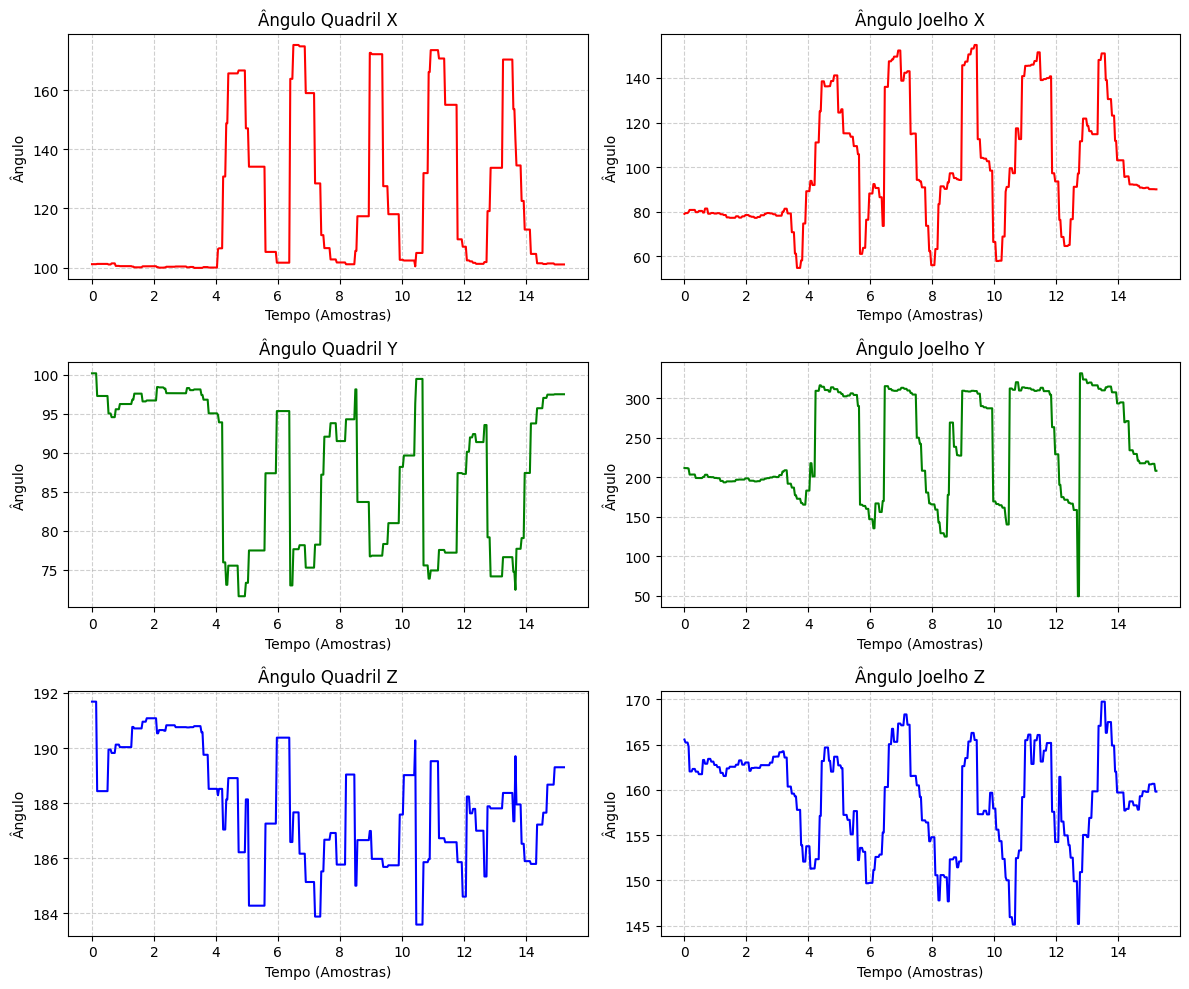

In [7]:
import matplotlib.pyplot as plt

# Criar subplots 3x2 (3 linhas, 2 colunas)
fig, axes = plt.subplots(3, 2, figsize=(12, 10))

# Lista de títulos e dados
titulos = [
    "Ângulo Quadril X", "Ângulo Joelho X",
    "Ângulo Quadril Y", "Ângulo Joelho Y",
    "Ângulo Quadril Z", "Ângulo Joelho Z"
]
cores = ["red", "red", "green", "green", "blue", "blue"]
dados = [quadril_x, joelho_x, quadril_y, joelho_y, quadril_z, joelho_z]

# Loop para configurar os plots
for i, ax in enumerate(axes.flat):
    ax.plot(dados[i], color=cores[i])
    ax.set_title(titulos[i], fontsize=12)  # Tamanho do título
    ax.set_ylabel("Ângulo", fontsize=10)  # Rótulo do eixo Y
    ax.set_xlabel("Tempo (Amostras)", fontsize=10)  # Exibir sempre o eixo X
    ax.grid(True, linestyle="--", alpha=0.6)  # Adiciona grade pontilhada

# Melhor organização do layout
plt.tight_layout()
plt.show()



É possível observar que os eixos X em ambos os gráficos apresentam grande oscilação, tornando sua utilização para a análise de compensação de movimento mais desafiadora.

## Graficos dos Eixos X, Y e Z do Quadril com o index temporal

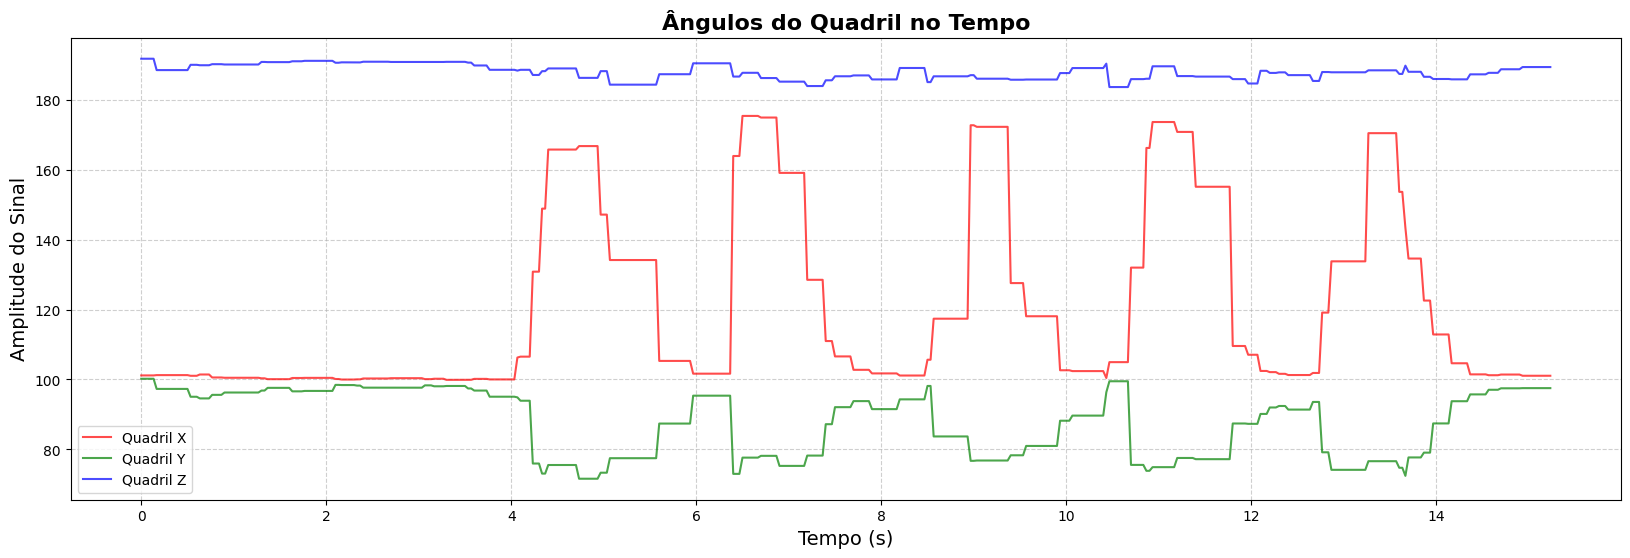

In [8]:


# Criar figura
plt.figure(figsize=(20, 6))

# Plotar os ângulos do quadril nos eixos X, Y e Z
plt.plot(df.index, quadril_x, color='red', alpha=0.7, linestyle="-", label="Quadril X")
plt.plot(df.index, quadril_y, color='green', alpha=0.7, linestyle="-", label="Quadril Y")
plt.plot(df.index, quadril_z, color='blue', alpha=0.7, linestyle="-", label="Quadril Z")

# Configurações do gráfico
plt.title("Ângulos do Quadril no Tempo", fontsize=16, fontweight="bold")
plt.xlabel("Tempo (s)", fontsize=14)
plt.ylabel("Amplitude do Sinal", fontsize=14)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)

# Exibir gráfico
plt.show()


Os eixos Y e Z permitem uma melhor identificação das variações ao longo do tempo, facilitando a análise do movimento.

## Graficos dos Eixos X, Y e Z do Joelho com o index temporal

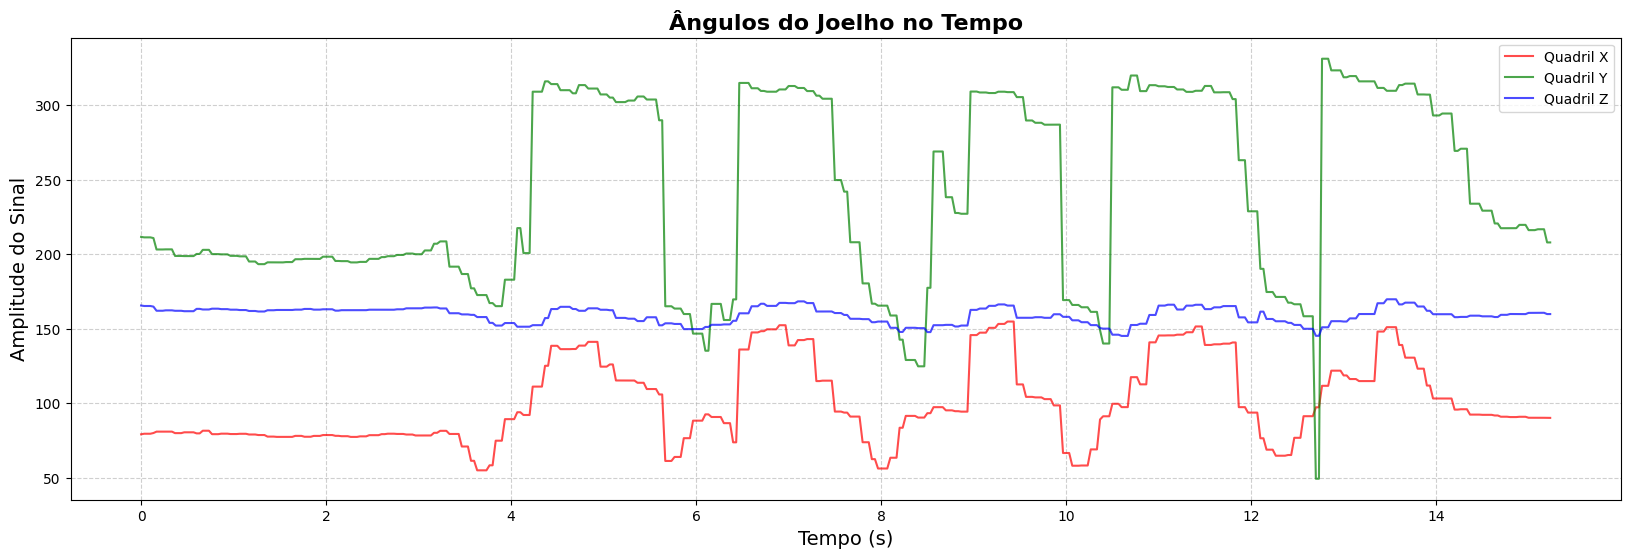

In [9]:


# Criar figura
plt.figure(figsize=(20, 6))

# Plotar os ângulos do quadril nos eixos X, Y e Z
plt.plot(df.index, joelho_x, color='red', alpha=0.7, linestyle="-", label="Quadril X")
plt.plot(df.index, joelho_y, color='green', alpha=0.7, linestyle="-", label="Quadril Y")
plt.plot(df.index, joelho_z, color='blue', alpha=0.7, linestyle="-", label="Quadril Z")

# Configurações do gráfico
plt.title("Ângulos do Joelho no Tempo", fontsize=16, fontweight="bold")
plt.xlabel("Tempo (s)", fontsize=14)
plt.ylabel("Amplitude do Sinal", fontsize=14)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)

# Exibir gráfico
plt.show()


Os eixos Y e Z permitem uma melhor identificação das variações ao longo do tempo, facilitando a análise do movimento.









## Grafico do Quadril e Joelho junto 

<Figure size 640x480 with 0 Axes>

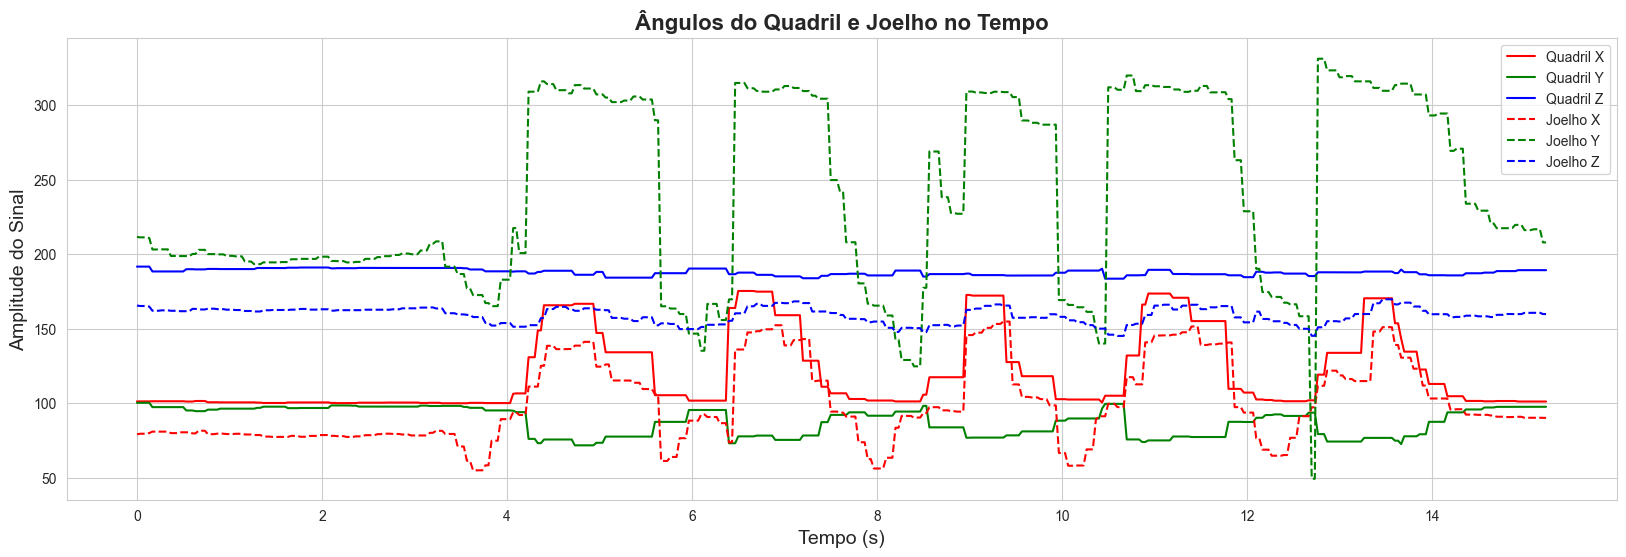

In [10]:

plt.clf()
sns.set_style("whitegrid")

# Criar figura
plt.figure(figsize=(20, 6))

# Plotar os ângulos do quadril nos eixos X, Y e Z
sns.lineplot(x=df.index, y=quadril_x, color='red', label="Quadril X")
sns.lineplot(x=df.index, y=quadril_y, color='green', label="Quadril Y")
sns.lineplot(x=df.index, y=quadril_z, color='blue', label="Quadril Z")

# Plotar os ângulos do joelho nos eixos X, Y e Z
sns.lineplot(x=df.index, y=joelho_x, color='red', linestyle="--", label="Joelho X")
sns.lineplot(x=df.index, y=joelho_y, color='green', linestyle="--", label="Joelho Y")
sns.lineplot(x=df.index, y=joelho_z, color='blue', linestyle="--", label="Joelho Z")

# Configurações do gráfico
plt.title("Ângulos do Quadril e Joelho no Tempo", fontsize=16, fontweight="bold")
plt.xlabel("Tempo (s)", fontsize=14)
plt.ylabel("Amplitude do Sinal", fontsize=14)
plt.legend()
plt.show()

Identificação de que o joelho se movimenta primeiro que o quadril

## Manipulação do tempo para melhor visualização dos gráficos

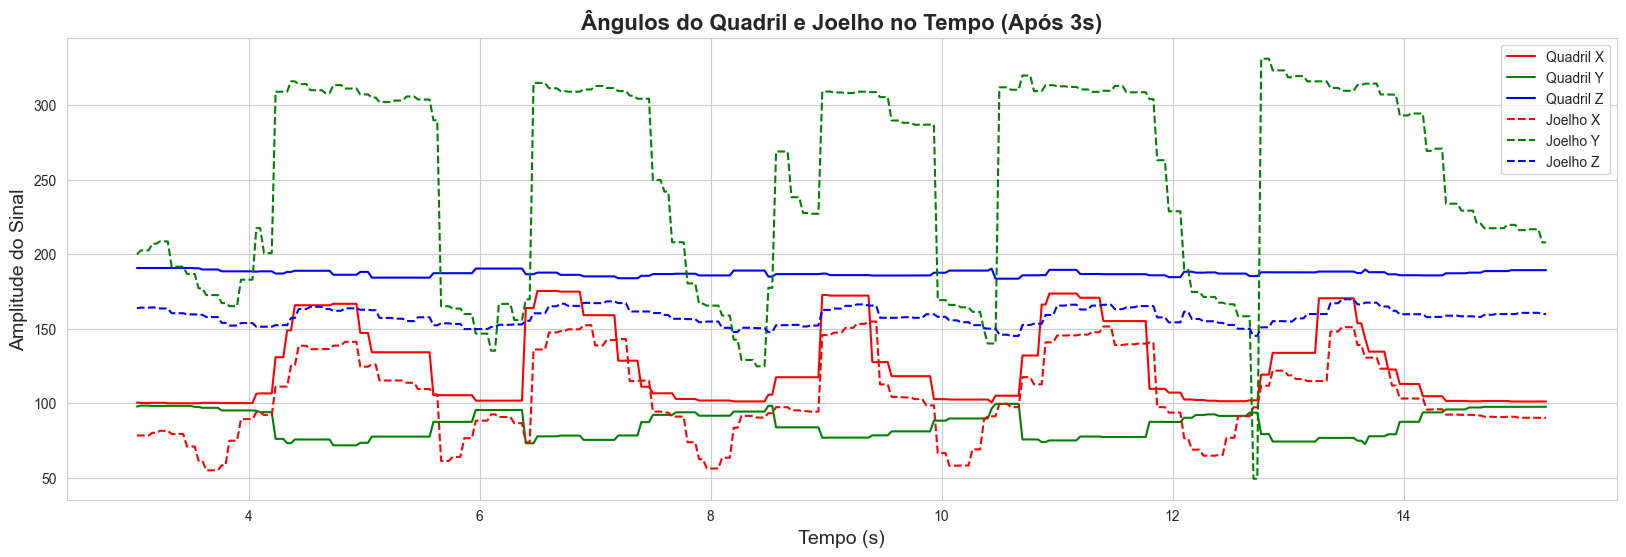

In [11]:


# Filtrar os dados para remover os primeiros 3 segundos
df_filtrado = df.loc[df.index > 3].copy() 

# Estilo do Seaborn para um visual mais profissional
sns.set_style("whitegrid")

# Criar figura
plt.figure(figsize=(20, 6))

# Plotar os ângulos do quadril nos eixos X, Y e Z
sns.lineplot(x=df_filtrado.index, y=df_filtrado.iloc[:, 19], color='red', label="Quadril X")  # Coluna 19ª
sns.lineplot(x=df_filtrado.index, y=df_filtrado.iloc[:, 20], color='green', label="Quadril Y")  # Coluna 20ª
sns.lineplot(x=df_filtrado.index, y=df_filtrado.iloc[:, 21], color='blue', label="Quadril Z")  # Coluna 21ª

# Plotar os ângulos do joelho nos eixos X, Y e Z
sns.lineplot(x=df_filtrado.index, y=df_filtrado.iloc[:, 22], color='red', linestyle="--", label="Joelho X")  # Coluna 22ª
sns.lineplot(x=df_filtrado.index, y=df_filtrado.iloc[:, 23], color='green', linestyle="--", label="Joelho Y")  # Coluna 23ª
sns.lineplot(x=df_filtrado.index, y=df_filtrado.iloc[:, 24], color='blue', linestyle="--", label="Joelho Z")  # Coluna 24ª

# Configurações do gráfico
plt.title("Ângulos do Quadril e Joelho no Tempo (Após 3s)", fontsize=16, fontweight="bold")
plt.xlabel("Tempo (s)", fontsize=14)
plt.ylabel("Amplitude do Sinal", fontsize=14)
plt.legend()
plt.show()


# Conclusões

Ao longo deste teste, foi possível realizar uma análise detalhada dos ângulos do joelho e do quadril, tanto de forma individual quanto sincronizada. A separação clara dos eixos X, Y e Z permitiu uma avaliação mais precisa do comportamento de cada articulação ao longo do tempo. Além disso, identificou-se que os eixos X apresentaram maior oscilação, dificultando sua utilização na análise de compensação de movimento, enquanto os eixos Y e Z se mostraram mais estáveis e úteis para identificar variações. Dessa forma, a abordagem utilizada possibilitou uma melhor compreensão dos padrões de movimento e abre caminho para futuras investigações e aprimoramentos na análise biomecânica.
Pode copiar todo o conteúdo dessa seção lá na parte de conclusões do cabeçalho.